In [1]:
import pandas as pd
import numpy as np
import sklearn.preprocessing as pp



In [2]:
#set Data Ingestion fields
path_to_load = '/Volumes/ASSD/pre_epi_seizures/h5_files/processing_datasets/seizure_datasets_new.h5'
path_to_map = '/Volumes/ASSD/pre_epi_seizures/h5_files/processing_datasets/seizure_datasets_new_map.txt'


label_struct = {
                        'pre_ictal':{
                            'label': 1,
                            'color': 'yellow',
                            'intervals_samples': [(1000 * 0 * 60, 1000 * 50 * 60 )]
                                     },
                        'ictal':{
                            'label': 0,
                            'color': 'red',
                            'intervals_samples': [(1000 * 50 * 60, 1000 * 70 * 60 )]
                                 },
                        }


In [3]:
# Set the hyperparameters of analysis
feature_slot = 'hrv_time_features'
patient_list = [3, 5]
lead_list = ['ECG-']
scaler = pp.MinMaxScaler()


In [4]:
# Data Ingestion
import convertpandas as cv_pd

In [5]:
seizure_data = cv_pd.convert_to_pandas(path_to_load, path_to_map,
                        patient_list, feature_slot,
                        lead_list, label_struct)

[2018-02-20 10:55:33.854339]:get_signal:20:Loading [signal: 3_FA7774DK_ECG-_2017-04-20 07:38:44.000000_0][group: /3000_1200/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:4200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/hrv_computation_$beginwin_win:0.001__init:rpeaks[0]__finish:rpeaks[-1]__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_/hrv_time_features_$beginwin_win:120__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_]
[2018-02-20 10:55:33.861090]:get_signal:20:Loading [signal: 3_FA7774DR_ECG-_2017-04-20 16:09:45.000000_1][group: /3000_1200/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:4200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwi

[2018-02-20 10:55:33.882091]:get_signal:20:Loading [signal: 5_FA7773TT_ECG-_2016-08-24 13:48:00.000000_1][group: /3000_1200/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:4200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/hrv_computation_$beginwin_win:0.001__init:rpeaks[0]__finish:rpeaks[-1]__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_/hrv_time_features_$beginwin_win:120__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_]
[2018-02-20 10:55:33.883918]:get_signal:20:Loading [signal: 5_FA7773U1_ECG-_2016-08-25 01:44:21.000000_2][group: /3000_1200/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:4200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwi

closed
closed
closed


In [6]:
seizure_data

,mean_NN,SD_NN,p_NN50,var_NN,LF,HF,LF_HF,time_sample,patient_nr,seizure_nr,label,color
0,1.051936,0.067105,120000.0,0.004503,0.291912,0.130535,2.236279,2111,3,0,1.0,yellow
1,1.052184,0.067851,120000.0,0.004604,0.304367,0.121847,2.497934,32111,3,0,1.0,yellow
2,1.039448,0.090097,120000.0,0.008117,0.350268,0.322294,1.086798,62111,3,0,1.0,yellow
3,1.020874,0.161599,120000.0,0.026114,0.666613,1.622045,0.410971,92111,3,0,1.0,yellow
4,0.972798,0.194223,120000.0,0.037723,0.700044,1.598842,0.437844,122111,3,0,1.0,yellow
5,0.959872,0.192479,120000.0,0.037048,0.749903,1.627128,0.460876,152111,3,0,1.0,yellow
6,0.957033,0.182278,120000.0,0.033225,1.123207,0.923052,1.216840,182111,3,0,1.0,yellow
7,0.961906,0.119495,120000.0,0.014279,0.414214,0.125720,3.294748,212111,3,0,1.0,yellow
8,1.006262,0.059205,120000.0,0.003505,0.168420,0.110544,1.523554,242111,3,0,1.0,yellow
9,1.014183,0.050185,120000.0,0.002519,0.116074,0.096100,1.207847,272111,3,0,1.0,yellow


In [7]:
# set Labeling structure
path_to_load = '/Volumes/ASSD/pre_epi_seizures/h5_files/processing_datasets/baseline_datasets_new.h5'
path_to_map = '/Volumes/ASSD/pre_epi_seizures/h5_files/processing_datasets/baseline_datasets_new_map.txt'


baseline_label_struct = {
                         'baseline':{
                            'label': -1,
                            'color': 'green',
                            'intervals_samples': [(0, 1000 *  60 * 60 )]
                                    },
                        }




In [8]:
baseline_data = cv_pd.convert_to_pandas(path_to_load, path_to_map,
                        patient_list, feature_slot,
                        lead_list, baseline_label_struct)

[2018-02-20 10:55:34.084437]:get_signal:20:Loading [signal: 3_FA7774DI_ECG-_2017-04-20 03:38:19.000000][group: /raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:4200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/hrv_computation_$beginwin_win:0.001__init:rpeaks[0]__finish:rpeaks[-1]__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_/hrv_time_features_$beginwin_win:120__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_]
[2018-02-20 10:55:34.086543]:get_signal:20:Loading [signal: 5_FA7773TA_ECG-_2016-08-23 04:23:59.000000][group: /raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:4200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__fin

closed
closed
closed


In [9]:
baseline_data

,mean_NN,SD_NN,p_NN50,var_NN,LF,HF,LF_HF,time_sample,patient_nr,seizure_nr,label,color
0,0.961516,0.070657,120000.0,0.004992,0.204625,0.211855,0.965875,2570,3,0,-1.0,green
1,0.967918,0.043845,120000.0,0.001922,0.152258,0.043737,3.481176,32570,3,0,-1.0,green
2,0.987343,0.060559,120000.0,0.003667,0.248194,0.082817,2.996881,62570,3,0,-1.0,green
3,0.996038,0.063283,120000.0,0.004005,0.200812,0.127719,1.572295,92570,3,0,-1.0,green
4,0.990559,0.064283,120000.0,0.004132,0.185957,0.139358,1.334385,122570,3,0,-1.0,green
5,0.989042,0.067710,120000.0,0.004585,0.196982,0.172344,1.142955,152570,3,0,-1.0,green
6,0.992608,0.118442,120000.0,0.014028,0.711912,0.661079,1.076894,182570,3,0,-1.0,green
7,0.981983,0.115525,120000.0,0.013346,0.648247,0.626102,1.035369,212570,3,0,-1.0,green
8,0.975397,0.118555,120000.0,0.014055,0.641229,0.614684,1.043184,242570,3,0,-1.0,green
9,0.974091,0.118771,120000.0,0.014106,0.664930,0.594671,1.118147,272570,3,0,-1.0,green


In [10]:
# Aggregat the data --Only works if analysis is focused on the same feature slot
data = pd.concat([seizure_data, baseline_data]).reset_index(drop=True)
data


,mean_NN,SD_NN,p_NN50,var_NN,LF,HF,LF_HF,time_sample,patient_nr,seizure_nr,label,color
0,1.051936,0.067105,120000.0,0.004503,0.291912,0.130535,2.236279,2111,3,0,1.0,yellow
1,1.052184,0.067851,120000.0,0.004604,0.304367,0.121847,2.497934,32111,3,0,1.0,yellow
2,1.039448,0.090097,120000.0,0.008117,0.350268,0.322294,1.086798,62111,3,0,1.0,yellow
3,1.020874,0.161599,120000.0,0.026114,0.666613,1.622045,0.410971,92111,3,0,1.0,yellow
4,0.972798,0.194223,120000.0,0.037723,0.700044,1.598842,0.437844,122111,3,0,1.0,yellow
5,0.959872,0.192479,120000.0,0.037048,0.749903,1.627128,0.460876,152111,3,0,1.0,yellow
6,0.957033,0.182278,120000.0,0.033225,1.123207,0.923052,1.216840,182111,3,0,1.0,yellow
7,0.961906,0.119495,120000.0,0.014279,0.414214,0.125720,3.294748,212111,3,0,1.0,yellow
8,1.006262,0.059205,120000.0,0.003505,0.168420,0.110544,1.523554,242111,3,0,1.0,yellow
9,1.014183,0.050185,120000.0,0.002519,0.116074,0.096100,1.207847,272111,3,0,1.0,yellow


In [11]:
# Drop missing values
data = data.dropna(axis=0, how='any').reset_index(drop=True)

In [12]:
data

,mean_NN,SD_NN,p_NN50,var_NN,LF,HF,LF_HF,time_sample,patient_nr,seizure_nr,label,color
0,1.051936,0.067105,120000.0,0.004503,0.291912,0.130535,2.236279,2111,3,0,1.0,yellow
1,1.052184,0.067851,120000.0,0.004604,0.304367,0.121847,2.497934,32111,3,0,1.0,yellow
2,1.039448,0.090097,120000.0,0.008117,0.350268,0.322294,1.086798,62111,3,0,1.0,yellow
3,1.020874,0.161599,120000.0,0.026114,0.666613,1.622045,0.410971,92111,3,0,1.0,yellow
4,0.972798,0.194223,120000.0,0.037723,0.700044,1.598842,0.437844,122111,3,0,1.0,yellow
5,0.959872,0.192479,120000.0,0.037048,0.749903,1.627128,0.460876,152111,3,0,1.0,yellow
6,0.957033,0.182278,120000.0,0.033225,1.123207,0.923052,1.216840,182111,3,0,1.0,yellow
7,0.961906,0.119495,120000.0,0.014279,0.414214,0.125720,3.294748,212111,3,0,1.0,yellow
8,1.006262,0.059205,120000.0,0.003505,0.168420,0.110544,1.523554,242111,3,0,1.0,yellow
9,1.014183,0.050185,120000.0,0.002519,0.116074,0.096100,1.207847,272111,3,0,1.0,yellow


In [13]:
# state the Data metafeatures
metafeatures = ['patient_nr', 'seizure_nr', 'time_sample', 'label', 'color']
colormap = data['color'].unique()

# create pallete 
labels = data['label'].unique()
color = {label:color
           for label, color in zip(labels, colormap)}



In [14]:
# Normalize data
X = data.drop(metafeatures, axis=1)

X_norm_np = scaler.fit_transform(X)

X_norm = pd.DataFrame(X_norm_np, columns=X.columns)


In [15]:
# Augment data
X_y = X_norm
X_y['label'] = data['label']

In [16]:
# Share data between notebooks
%store data
%store X_y
%store metafeatures

Stored 'data' (DataFrame)
Stored 'X_y' (DataFrame)
Stored 'metafeatures' (list)


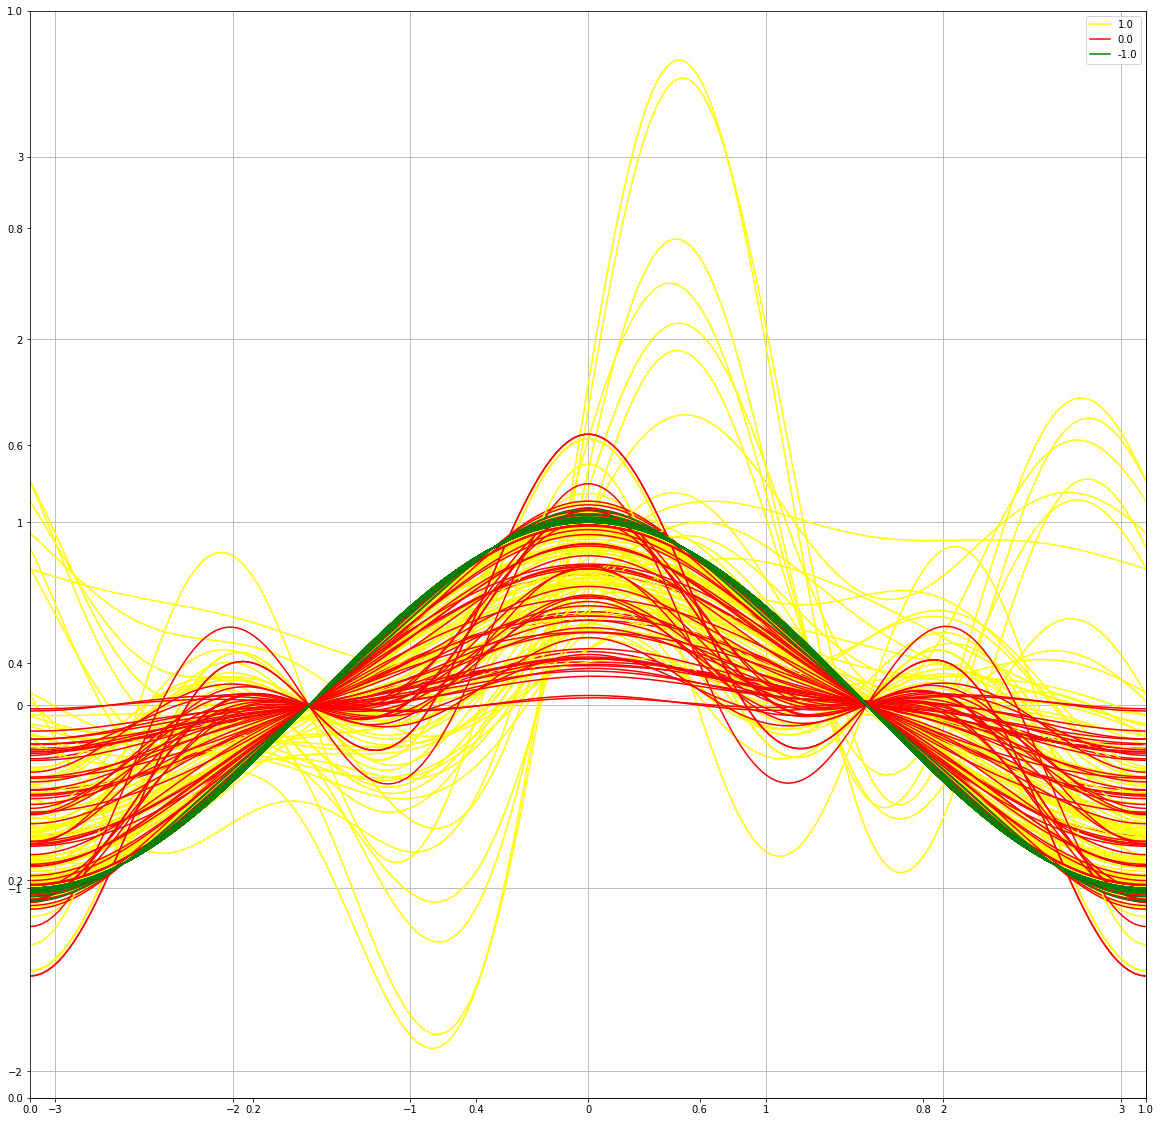

In [17]:
% run plotEDA.ipynb

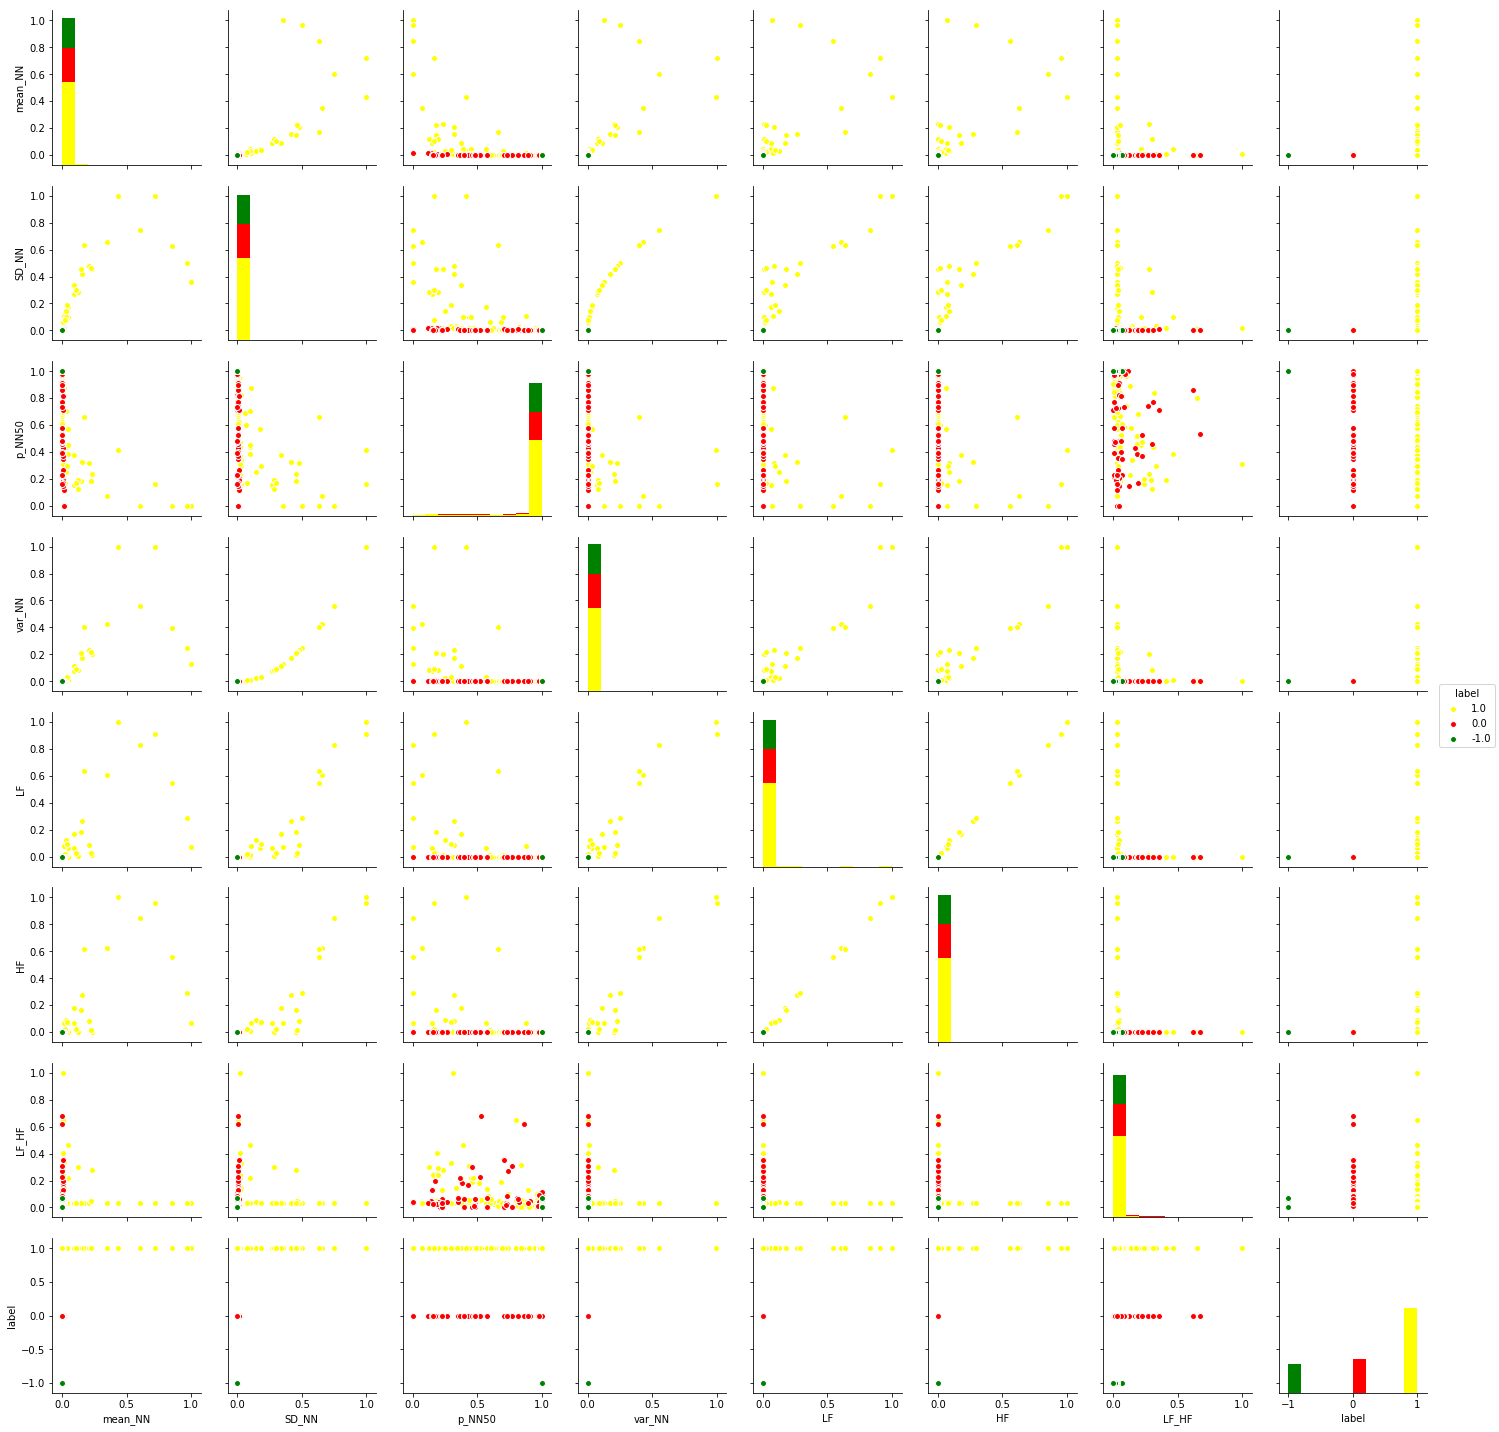

In [18]:
% run plotPAIR.ipynb

{0.0: 'red', 1.0: 'yellow', -1.0: 'green'}
0


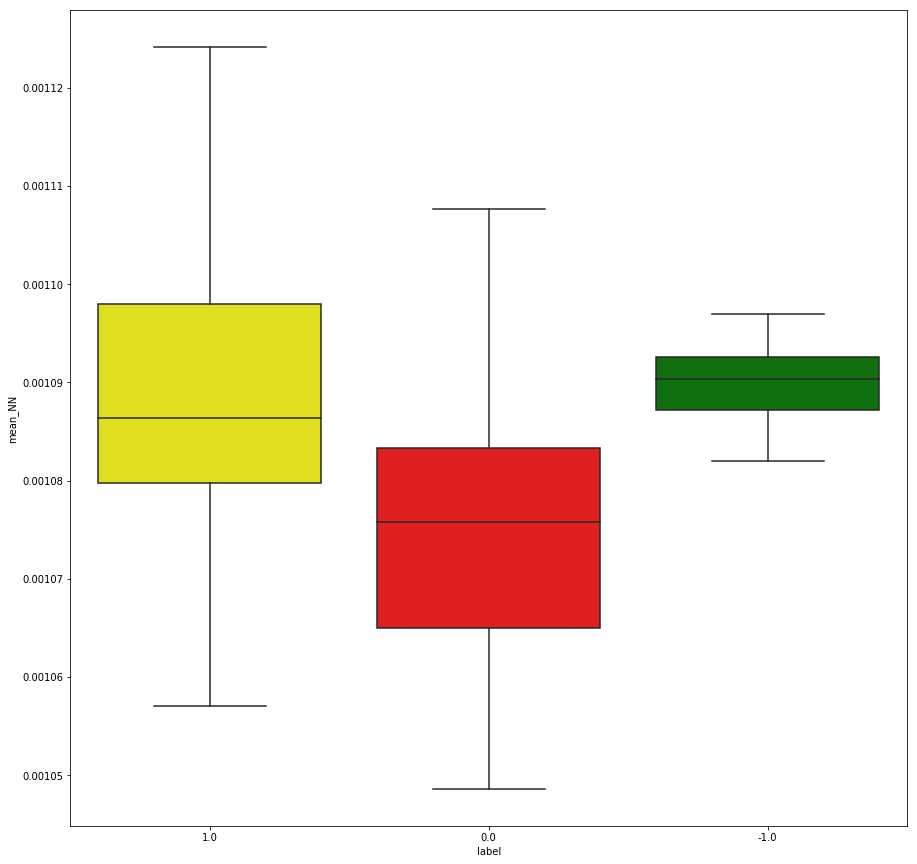

1


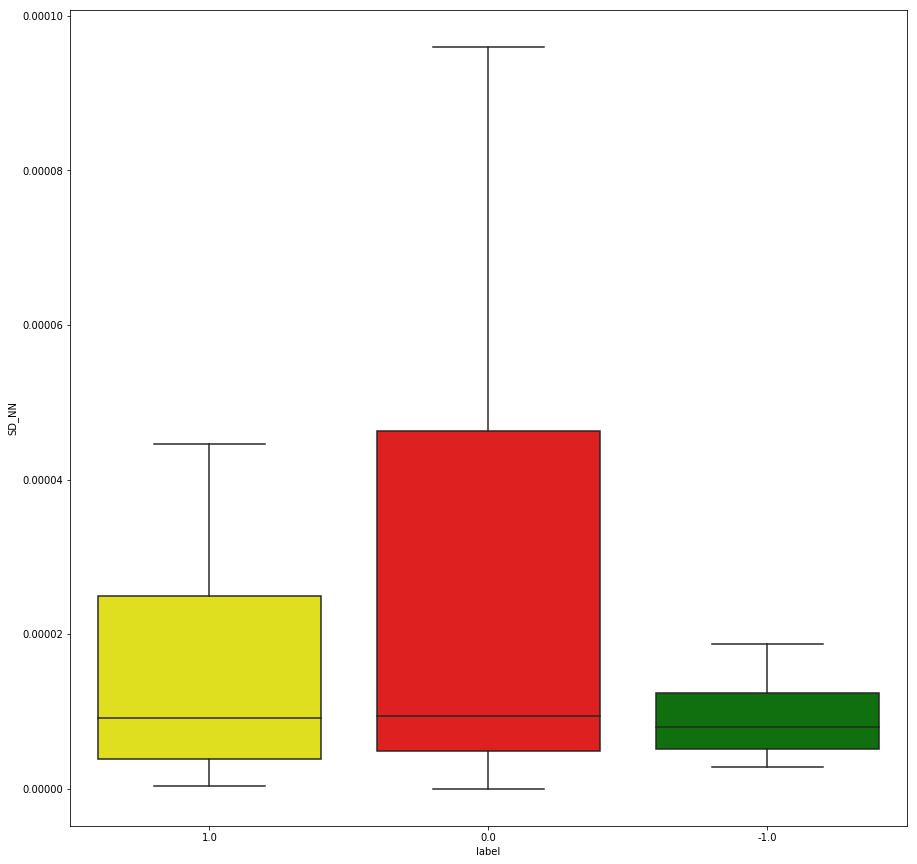

2


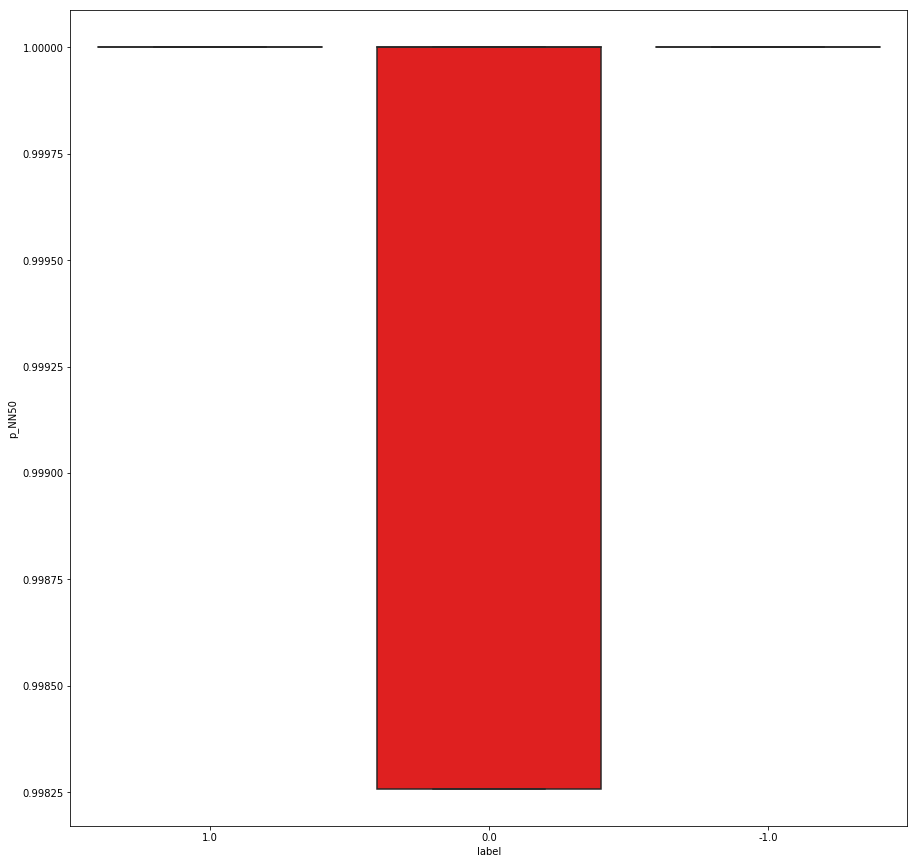

3


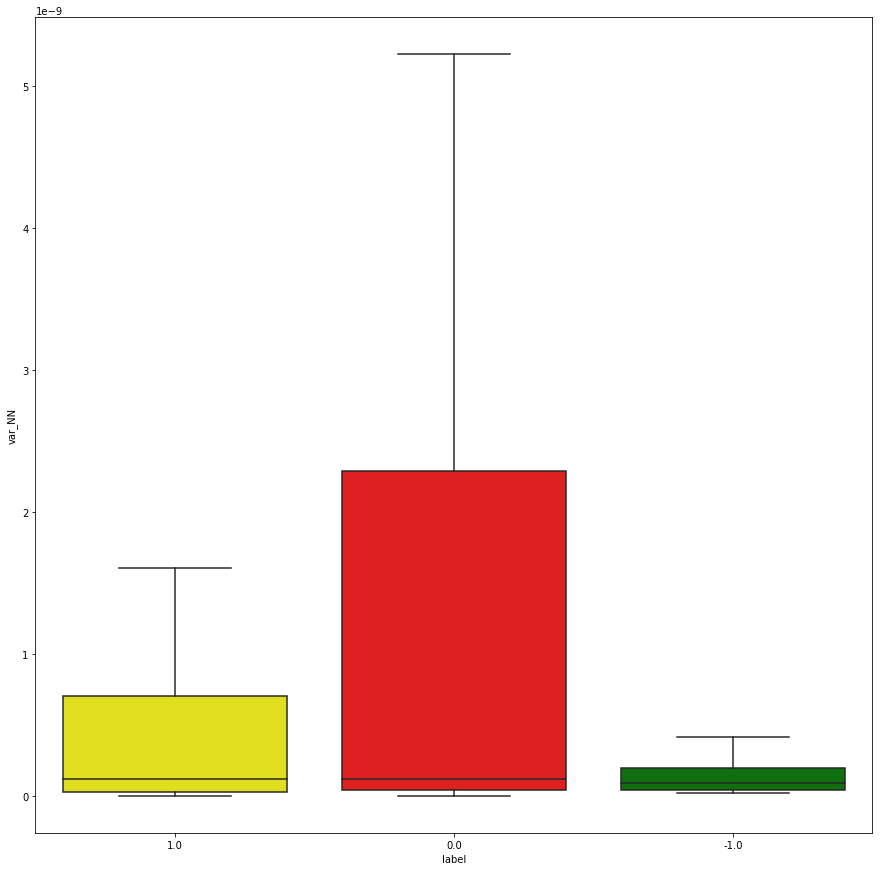

4


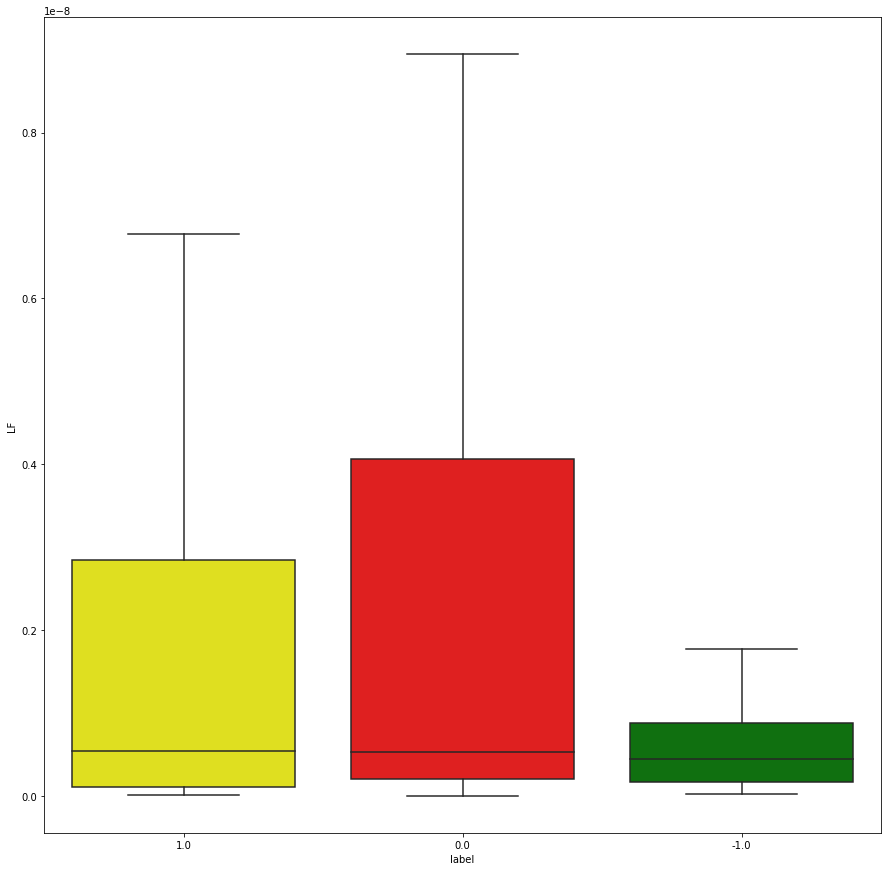

5


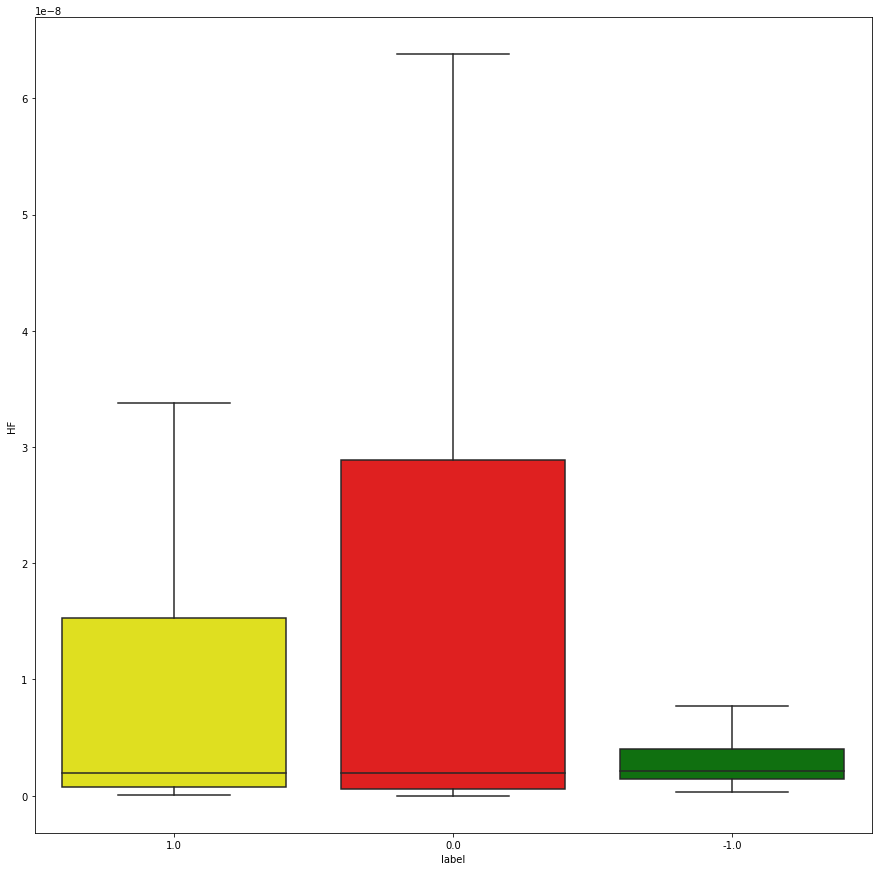

6


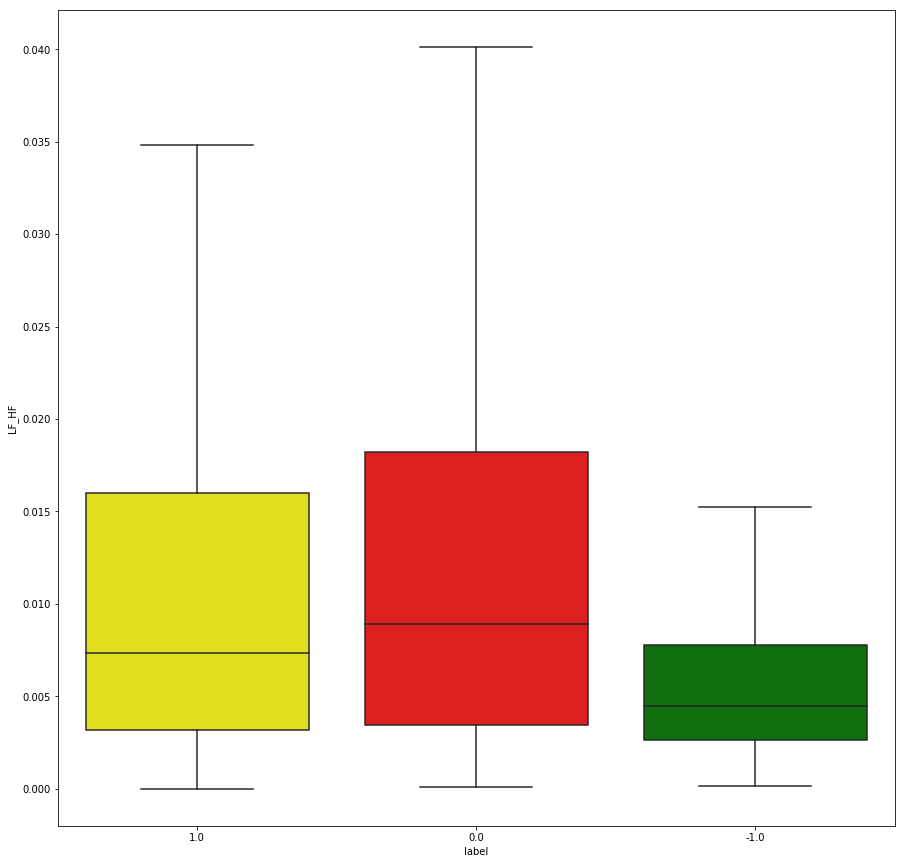

In [19]:
%run plotBOX.ipynb


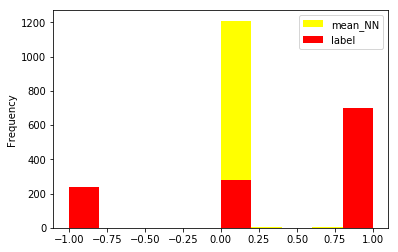

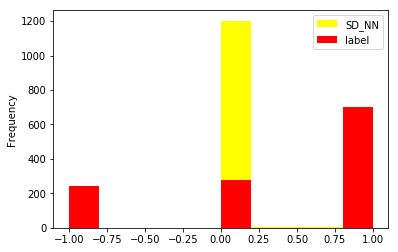

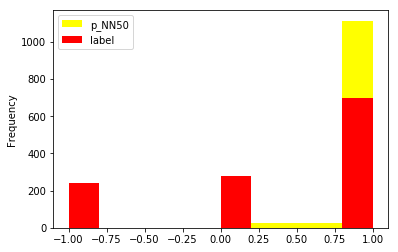

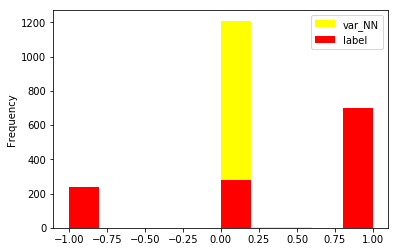

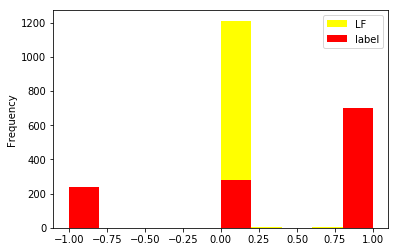

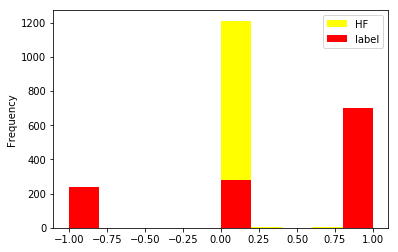

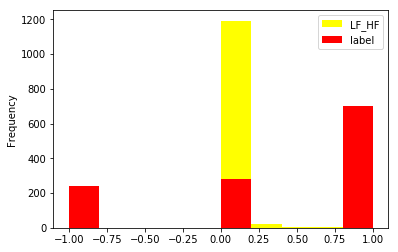

In [20]:
% run plotHIST.ipynb